# M√©todo de Diferen√ßa em Diferene√ßas (Difference-in-Differences)

Prof. Daniel de Abreu Pereira Uhr


## Conte√∫do

* Introdu√ß√£o ao M√©todo de Diferen√ßa em Diferen√ßas
* Nota√ß√µes Gerais
* DD Can√¥nico Simples (2x2)
* Hip√≥teses de Identifica√ß√£o
* Modelo DD por meio de Regress√µes
  * Modelo Can√¥nico Simples (2x2)
  * Modelo Can√¥nico Simples (2x2) com Controles
  * Modelo Can√¥nico com V√°rios Per√≠odos de Tempo e Controles
  * Modelo Can√¥nico com Interven√ß√£o Aplicada em Dimens√£o Agregada, v√°rios per√≠odos de tempo e Controles 
  * Especifica√ß√£o T√≠pica para Dados em Painel (Two-Way Fixed Effecs - TWFE)
* Evid√™ncias para a Hip√≥tese de Tend√™ncias Paralelas
  * Event Study Design
* Aplica√ß√£o em Python 1
* Aplica√ß√£o em Python 2


## Refer√™ncias

* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Roth, Sant¬¥Anna, Bilinski and Poe (2023), What‚Äôs Trending in Difference-in-Differences? A Synthesis of the Recent Econometrics Literature.
* Joshua D. Angrist and J√∂rn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Facure, Matheus. Causal Inference for Brave and True. https://matheusfacure.github.io/python-causality-handbook/landing-page.html 
* [Avalia√ß√£o Econ√¥mica de Projetos Sociais. Ita√∫ Social, 2017](https://www.itausocial.org.br/wp-content/uploads/2018/05/avaliacao-economica-3a-ed_1513188151.pdf). Cap√≠tulos 1, 2 e 3. 
* Card and Krueger (1994). Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania. American Economic Review, 84(4):772-793. (https://davidcard.berkeley.edu/papers/njmin-aer.pdf)
* Notas pr√≥prias.‚Äã



**Observa√ß√µes:** O material apresentado aqui √© uma adapta√ß√£o do material de aula do Prof. Daniel de Abreu Pereira Uhr, e n√£o deve ser utilizado para fins comerciais. O material √© disponibilizado para fins educacionais e de pesquisa, e n√£o deve ser reproduzido sem a devida autoriza√ß√£o do autor. Este material pode conter erros e imprecis√µes. O autor n√£o se responsabiliza por quaisquer danos ou preju√≠zos decorrentes do uso deste material. O uso deste material √© de responsabilidade exclusiva do usu√°rio. Caso voc√™ encontre erros ou imprecis√µes neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugest√£o de melhoria.

---

### Introdu√ß√£o ao M√©todo de Diferen√ßa em Diferen√ßas

O **m√©todo de diferen√ßas em diferen√ßas** (Difference-in-Differences / Diff-in-diff / DID / DD) √© uma t√©cnica econom√©trica utilizada para estimar o **efeito causal** de uma interven√ß√£o, pol√≠tica ou tratamento em um grupo de unidades observacionais ao longo do tempo. O m√©todo de DD √© baseado no c√°lculo de uma dupla subtra√ß√£o: a primeira se refere √† diferen√ßa das m√©dias da vari√°vel de resultado entre os per√≠odos anterior e posterior √† interven√ß√£o para o grupo de tratamento e para o de controle, e a segunda se refere √† diferen√ßa da primeira diferen√ßa calculada entre esses dois grupos. Naturalmente, a operacionaliza√ß√£o do m√©todo requer a exist√™ncia de informa√ß√µes para ambos os grupos para, pelo menos, um per√≠odo de tempo antes e um per√≠odo depois da interven√ß√£o. Pode ser utilizado tanto com **dados de painel** quanto com **dados seccionais** (cross-section) repetidos no tempo. Os primeiros tipicamente referem-se a informa√ß√µes de indiv√≠duos, fam√≠lias ou empresas que s√£o seguidos ao longo do tempo, enquanto os segundos s√£o dados temporais calculados para unidades mais agregadas, tais como escolas, hospitais, setores de atividade, bairros, munic√≠pios ou estados.

Outra importante vantagem do m√©todo de DD √© que ele permite o controle do vi√©s de sele√ß√£o por caracter√≠sticas n√£o observ√°veis invariantes no tempo. 

#### Nota√ß√µes Gerais

A literatura n√£o apresenta uma nota√ß√£o padr√£o para o m√©todo de DD. A tabela abaixo apresenta uma nota√ß√£o geralmente utilizada para o m√©todo de DD.


| S√≠mbolo | Significado | 
|:-----: | :---------:|
|$$Y_{i,t} $$ | Vari√°vel de resultado para o indiv√≠duo i no momento t|
|$$D_{i}=0 $$ | Indiv√≠duos i que n√£o receberam o tratamento (grupo de controle ou de compara√ß√£o)|
|$$D_{i}=1 $$ | Indiv√≠duos i que receberam o tratamento (grupo de tratamento)|
|$$t=1,..,t_0$$ | Per√≠odos pr√©-tratamento (baseline)|
|$$t= t_0+1, ..., t$$ | Per√≠odos p√≥s-tratamento|
|$$Y_{i,t}(D=1) $$ | Resultado dos individuos i tratados no tempo t|
|$$Y_{i,t}(D=0) $$ | Resultado dos individuos i n√£o tratados no tempo t|
|$$X$$ | Covari√°veis|


#### DD Can√¥nico Simples (2x2)

Para entender o m√©todo de forma mais r√°pida e clara, √© importante come√ßar com o modelo mais simples. Goodman-Bancon chama o m√©todo DD Can√¥nico Simples de 2x2. Isto √©, o caso de dois grupos e dois per√≠odos de tempo. Ent√£o vamos utilizar a nota√ß√£o definida anteriormente para modelar nosso DD 2x2. $Y_{i,t}(0,0)$ denota o resultado potencial no per√≠odo $t$ se $i$ permanece n√£o tratado em ambos os per√≠odos. Caso contr√°rio, considere $Y_{i,t}(0,1)$ como o resultado potencial para a unidade $i$ no per√≠odo $t$ se $i$ permanece n√£o tratada no primeiro per√≠odo mas √© exposta ao tratamento no segundo per√≠odo. Para simplificar a nota√ß√£o, podemos escrever $Y_{i,t}(0)= Y_{i,t}(0,0)$ e $Y_{i,t}(1)= Y_{i,t}(0,1)$.

Devido ao problema fundamental da infer√™ncia causal (Holland, 1986), n√≥s observamos apenas um dos dois resultados poss√≠veis para cada unidade $i$:

$$ Y_{i,t}= D_{i} Y_{i,t}(1) + (1-D_{i}) Y_{i,t}(0) $$


Onde o desenho do DD tem um grupo de tratamento ($D=1$) e um grupo de n√£o tratados ($D=0$). Existe um per√≠odo pr√©-tratamento ($t=1$) para o grupo tratado $Y_{i,t=1}(1)$, e um per√≠odo p√≥s tratamento $Y_{i,t=2}(1)$. O mesmo vale para o grupo de controle, $Y_{i,t=1}(0)$ e $Y_{i,t=2}(0)$.

$$ \hat{\beta}_{ATT}^{2x2} = (\overline{Y}_{i,t=2}(1) - \overline{Y}_{i,t=1}(1)) - (\overline{Y}_{i,t=2}(0) - \overline{Y}_{i,t=1}(0)) $$

onde o $\hat{\beta}_{ATT}^{2x2}$ √© o ATT estimado para o grupo tratado $D=1$. $\overline{y}$ √© a m√©dia amostral para aquele grupo espec√≠fico em um determinado per√≠odo de tempo.  

Vamos representar em termos de esperan√ßas condicionais (assumindo uma amostragem de uma popula√ß√£o grande):

$$ \hat{\beta}_{ATT}^{2x2} = (E[Y_{i,t=2}(1)|D_{i}=1] - E[Y_{i,t=1}(1)|D_{i}=1]) - (E[Y_{i,t=2}(0)|D_{i}=0] - E[Y_{i,t=1}(0)|D_{i}=0]) $$

Faremos um pequeno truque onde adicionamos zero ao lado direito para que possamos usar esses termos para ajudar a ilustrar algo importante.

$$ \hat{\beta}_{ATT}^{2x2} = \underbrace{(E[Y_{i,t=2}(1)|D_{i}=1] - E[Y_{i,t=1}(1)|,D_{i}=1]) - (E[Y_{i,t=2}(0)|D_{i}=0] - E[Y_{i,t=1}(0)|D_{i}=0])}_{\text{Switching Equation}} + \underbrace{(E[Y_{i,t=2}(0)|D_{i}=1] - E[Y_{i,t=2}(0)|D_{i}=1])}_{Zero} $$

Agora simplesmente reorganizamos esses termos para obter a decomposi√ß√£o em termos de resultados potenciais esperados condicionais.

$$ \hat{\beta}_{ATT}^{2x2} = \underbrace{(E[Y_{i,t=2}(1)|D=1] - E[Y_{i,t=2}(0)|D=1])}_{\beta_{ATT}} + \underbrace{[E[Y_{i,t=2}(0)|D=1] - E[Y_{i,t=1}(1)|D=1]] - (E[Y_{i,t=2}(0)|D=0] - E[Y_{i,t=1}(0)|D=0])}_{\text{Non-Parallel Trends Bias 2x2}} $$

Observe o lado direito da igualdade, mais especificadamente, o segundo termo da primeira parte , ele √© o contrafactual. E como j√° dissemos v√°rias vezes, os contrafactuais n√£o s√£o observ√°veis. Este resultado final √© muitas vezes chamado de **suposi√ß√£o de tend√™ncias paralelas** e √©, por defini√ß√£o, n√£o test√°vel, uma vez que n√£o podemos observar esta expectativa condicional contrafactual. Voltaremos a isso novamente, mas por enquanto simplesmente apresento-o √† sua considera√ß√£o.



**Exemplo**

Considere duas empresas. No primeiro momento, o sal√°rio m√©dio de uma das empresas √© de 1000 (Ponto A), e da outra empresa √© de 850 (ponto C). A primeira empresa aplica um Programa de Qualifica√ß√£o (tratamento) aos seus funcion√°rios, enquanto a outra empresa n√£o aplica qualquer programa. Posteriormente, observamos os sal√°rios das empresas, e a primeira empresa (Grupo Tratado) agora apresenta sal√°rios m√©dios de 1100 (Ponto B), enquanto a empresa que n√£o aplicou o programa (Grupo de controle) apresenta sal√°rios m√©dios de 900 (Ponto D). A figura ilustra o exemplo.

<div style="text-align:center;">
    <img src="images\DD_FIG1.png"  alt="Imagem" style="width: 500px;"/>
</div>


Repare que caso a empresa tratada n√£o tivesse aplicado o tratamento, esperar√≠amos que ela seguisse a trajet√≥ria de aumento dos sal√°rios conforme a empresa do grupo de controle (Ponto E). Assim, a diferen√ßa entre os sal√°rios que a empresa emprega ap√≥s o tratamento (ponto B) e o valor que a empresa tratada teria caso n√£o sofresse a pol√≠tica (Ponto E) representa o efeito causal da pol√≠tica.

O Gr√°fico pode ser escrito em uma tabela:


|  | Tratado | Controle | Diferen√ßa |
| :-----:   | :-----: | :-----: | :------: |
| Antes (Baseline) | $$\overline{Y}_{i,t=0}(1)=1000$$ Ponto (A) | $$\overline{Y}_{i,t=0}(0)=850$$ Ponto (C)  | $$\overline{Y}_{i,t=0}(1) - \overline{Y}_{i,t=0}(0) = 150 $$ |
| Depois (Followup) | $$\overline{Y}_{i,t=1}(1)=1100$$ Ponto (B) | $$\overline{Y}_{i,t=1}(0)=900$$ Ponto (D) | $$\overline{Y}_{i,t=1}(1) - \overline{Y}_{i,t=1}(0) = 200 $$ |
| Diferen√ßa | $$[\overline{Y}_{i,t=1}(1)-\overline{Y}_{i,t=0}(1)=100]$$ Trajet√≥ria do G.Tratado | $$[\overline{Y}_{i,t=1}(0)-\overline{Y}_{i,t=0}(0)=50]$$ Trajet√≥ria do G.Controle | $$ (\overline{Y}_{i,t=1}(1)-\overline{Y}_{i,t=0}(1)) - (\overline{Y}_{i,t=1}(0)-\overline{Y}_{i,t=0}(0))=50$$ Ponto B - E |


### Hip√≥teses de Identifica√ß√£o

O desafio para identificar o Efeito M√©dio do Tratamento Sobre os Tratados (Average Treatment Effect on the Treated - ATT) √© que os resultados potenciais para os tratados caso eles n√£o fossem tratados n√£o s√£o observ√°veis. Ent√£o o m√©todo DD resolve o problema ao imputar o valor da m√©dia contrafactual atrav√©s do uso da 

* (a) trajet√≥ria da vari√°vel de resultado do grupo de controle, e 
* (b) dos valores da vari√°vel de resultado dos tratados no per√≠odo baseline.

Hip√≥teses:

> 
> **Tend√™ncias Paralelas (Parallel Trends)**: Essa hip√≥tese sup√µe que o valor m√©dio da vari√°vel de resposta entre o estado contrafactual e seu valor no per√≠odo baseline para os tratados segue a mestra trajet√≥ria do valor m√©dio da vari√°vel de resposta do grupo de controle (lembre-se que no baseline ($t=1$), $Y_{i,1}(1) = Y_{i,1}(0)$).
> 
> $$E[Y_{i,2}(0)-Y_{i,1}(0)|D_{i}=1]=E[Y_{i,2}(0)-Y_{i,1}(0)|D_{i}=0]$$
> 
> **N√£o Antecipa√ß√£o dos Efeitos (No anticipatory effects)**: Essa hip√≥tese sup√µe que o tratamento n√£o tem efeito causal antes de sua implementa√ß√£o.
> $$ Y_{i,1}(0)=Y_{i,1}(1) $$
> 
> **Distribui√ß√£o dos dados**: Seja $W_{i}=(Y_{i,2}, Y_{i,1}, D_{i})¬¥$ o vetor das vari√°veis de resultados e do status do tratamento para a unidade $i$. N√≥s observamos uma amostra de N *i.i.d.* com $W_{i}$~$F$ para alguma distribui√ß√£o F (desconhecida) satisfazendo as tend√™ncias paralelas. Em outras palavras, os dados observados s√£o amostrados de uma popula√ß√£o maior de forma independente e identicamente distribu√≠da, onde cada observa√ß√£o segue a mesma distribui√ß√£o.

Nosso interesse √© identificar o chamado ***"Efeito do tratamento sobre os tratados"*** (*Average Treatment Effect on the Treated* - ATT), para o caso de dois per√≠odoso (**Caso Simples**):

> 
> $$ \beta_{ATT}= E[Y_{i,2}(1)-Y_{i,2}(0)|D_{i}=1] $$
>

Ou seja, queremos a m√©dia da diferen√ßa entre a vari√°vel de resultado observada dos indiv√≠duos $i$ do grupo que recebeu o tratamento e sua vari√°vel de resultado caso este indiv√≠duo $i$ n√£o tivesse recebido o tratamento (contrafactual), dado que estamos avaliando os tratados (condicional ao fato de serem tratados - $D_{i}=1$). Isso para o per√≠odo 2, onde eles foram tratados.

### Modelo DD por meio de Regress√µes

#### Modelo Can√¥nico Simples (2x2)

Chamaremos de DD can√¥nico quando o tratamento ocorre em um √∫nico momento no tempo sobre um grupo de indiv√≠duos espec√≠fico (tratados). Vamos come√ßar com o modelo mais simples (2x2), isto √© com dois per√≠odos de tempo - antes e depois da interven√ß√£o.

>
> $$ Y_{i,t}= \alpha + \beta_{1}.d_{t} + \beta_{2}.D_{i} + \beta_{3}(D_{i}.d_{t}) + \epsilon_{i,t} $$
> 

Note que $D_{i}$ e $d_{t}$ aparecem tanto individualmente, quanto interagidas. Suas presen√ßas isoladas captam as diferen√ßas da m√©dia de $Y_{i,t}$ entre o grupo de tratamento e controle e entre o per√≠odo anterior e posterior √† interven√ß√£o. O termo de intera√ß√£o capta o que ocorreu especificadamente com o grupo de tratamento no per√≠odo p√≥s-interven√ß√£o. O $\beta_{3}$ identifica o efeito do tratamento.

Graficamente:


<div style="text-align:center;">
    <img src="images\DD_FIG2.png"  alt="Imagem" style="width: 500px;"/>
</div>


#### Modelo Can√¥nico Simples (2x2) com Controles

Agora vamos para o caso de incluir controles (constantes no tempo - posteriormente relaxaremos essa quest√£o e veremos suas implica√ß√µes). Elas podem absorver parte do efeito que, na aus√™ncia delas poderia ser atribu√≠do √† interven√ß√£o.

>
> $$ Y_{i,t}= \alpha + \beta_{1}.d_{t} + \beta_{2}.D_{i} + \beta_{3}(D_{i}.d_{t}) + X_{i}.\gamma + \epsilon_{i,t} $$
> 

**A inclus√£o do vetor de controles no modelo implica que a an√°lise passa ser condicionada em $X_{i}$**, de modo que a os resultados s√£o condicionais $E[Y_{i,t}|D,X,t]$. Essa considera√ß√£o imp√µe que as tend√™ncias de cada $X$ do grupo tratado seja igual a tend√™ncia das vari√°veis $X$ do grupo de controle. Somente assim, o $\beta_{3}$ continua identificando o efeito do tratamento. Para evitar, consideramos aqui apenas os controles constantes no tempo.

Abordaremos com mais detalhes a quest√£o dos controles na pr√≥xima aula.

#### Modelo Can√¥nico com V√°rios Per√≠odos de Tempo e Controles

Agora vamos expandir a an√°lise para o caso em que h√° disponibilidade para v√°rios per√≠odos de tempo, $t=1,2,‚Ä¶,T$

>
> $$ Y_{i,t}= \alpha + \lambda_{t} + \theta.D_{i} + \beta_{3}(D_{i}.d_{t}) + X_{i}.\gamma + \epsilon_{i,t} $$
> 

Graficamente:

<div style="text-align:center;">
    <img src="images\DD_FIG3.png"  alt="Imagem" style="width: 500px;"/>
</div>

Note que haver√° diversas vari√°veis bin√°rias identificando cada ano espec√≠fico $t$.

#### Modelo Can√¥nico com Interven√ß√£o Aplicada em Dimens√£o Agregada, v√°rios per√≠odos de tempo e Controles 
Repare que a interven√ß√£o √© aplicada numa dimens√£o agregada ($g$). Esse tipo de an√°lise pode ser aplicada, por exemplo, quando nos deparamos com dados desagregados em n√≠vel individual, e nos deparamos com poss√≠veis agrega√ß√µes como escolas, setores, munic√≠pios ou estados... Ou seja, queremos verificar o efeito de uma interven√ß√£o aplicada no n√≠vel agregado sobre a m√©dia da vari√°vel de resultado dos indiv√≠duos $i$.

>
> $$ Y_{i,g,t}= \alpha + \mu_{g} + \lambda_{t} + \theta.D_{g,t} +  X_{g}.\gamma + \epsilon_{i,g,t} $$
> 

Note que haver√° diversas dummies para controlar os grupos $\mu_{g}$. Al√©m disso, a vari√°vel $D_{g,t}$ que assume valor um caso o indiv√≠duo $i$ √© tratado no per√≠odo $t$. 

#### Especifica√ß√£o T√≠pica para Dados em Painel (Two-Way Fixed Effecs - TWFE)

Nessa especifica√ß√£o controla-se o efeito fixo individual, que representa o elemento que absorve a influ√™ncia de qualquer caracter√≠stica (observ√°vel e n√£o observ√°vel) constante no tempo sobre a vari√°vel de resultado. 

>
> $$ Y_{i,t}= \alpha_{i} + \lambda_{t} + \beta.D_{i,t} + X_{i,t}.\gamma + \epsilon_{i,t} $$
> 

A vari√°vel $D_{i,t}$ que assume valor um caso o indiv√≠duo $i$ √© tratado no per√≠odo $t$. No contexto de m√∫ltiplos per√≠odos, essa vari√°vel cumpre o papel do termo de intera√ß√£o anterior. O m√©todo de DD √© capaz de contornar o problema de vi√©s de sele√ß√£o associado √†s caracter√≠sticas fixas (observ√°veis ou n√£o) dos indiv√≠duos no tempo.

**Neste modelo TWFE permitimos que as covari√°veis se modifiquem no tempo apenas para formula√ß√£o da equa√ß√£o econom√©trica, porque a introdu√ß√£o de covari√°veis na forma linear n√£o √© apropriada se o tratamento apresenta efeitos distintos em diferentes grupos da popula√ß√£o.**


### Infer√™ncia

Muitos estudos que empregam estrat√©gias de DD utilizam dados de muitos anos ‚Äì n√£o apenas um per√≠odo pr√©-tratamento e um per√≠odo p√≥s-tratamento (Can√¥nico Simples - 2x2). As vari√°veis ‚Äã‚Äãde interesse em muitas dessas configura√ß√µes variam apenas no n√≠vel do grupo, como o estado, e as vari√°veis ‚Äã‚Äãde resultado s√£o frequentemente correlacionadas em s√©rie. 

Bertrand, Duflo e Mullainathan (2004) salientam que os erros padr√£o convencionais muitas vezes subestimam gravemente o desvio padr√£o dos estimadores e, portanto, os erros padr√£o s√£o tendenciosos para baixo, ‚Äúmuito pequenos‚Äù, e, portanto, rejeitam excessivamente a hip√≥tese nula. Bertrand, Duflo e Mullainathan (2004) prop√µem as seguintes solu√ß√µes:

* Agregar os dados em um per√≠odo pr√© e um p√≥s.
* Clustering de erros padr√£o no n√≠vel do grupo.
  * Voc√™ simplesmente ajusta os erros padr√£o agrupando-os no n√≠vel do grupo.

### Evid√™ncias para a Hip√≥tese de Tend√™ncias Paralelas

#### Event Study Design

Quando temos um painel com a dimens√£o temporal mais longa, √© poss√≠vel termos uma evid√™ncia da hip√≥tese de tend√™ncias paralelas por meio do chamado **Event Study Design**. Nesse caso, o modelo √© estimado para cada per√≠odo de tempo, e o **coeficiente de interesse √© plotado em fun√ß√£o do tempo**. **Se a hip√≥tese de tend√™ncias paralelas for v√°lida, os coeficientes estimados devem ser pr√≥ximos de zero para os per√≠odos anteriores ao tratamento, e pr√≥ximos do valor do efeito causal para os per√≠odos posteriores ao tratamento**.

Considere o modelo de Diff-in-Diff (TWFE) com m√∫ltiplos per√≠odos e tratamento: 


>
> $$ Y_{i,t}=  \beta.D_{i,t} + \alpha_{i} + \lambda_{t} + \epsilon_{i,t} $$
> 


Onde $Y_{i,t}$ √© a vari√°vel de resultado; $D_{i,t}$ √© a vari√°vel de tratamento indicativa, onde assume valor 1 no primeiro momento da interven√ß√£o, e permanece com esse valor posteriormente. $\alpha_{i}$ √© o efeito fixo individual; e $\lambda_{t}$ √© o efeito fixo temporal. **Sabemos que essa estrutura √© flexivel e pode apresentar tanto o tratamento iniciando em um √∫nico momento do tempo (modelo can√¥nico), quanto o tratamento iniciando em diferentes momentos no tempo**.

Assim, no **Event Study** procura-se identificar as diferentes magnitudes do impacto decorrente do evento (interven√ß√£o) para cada ano espec√≠fico (*‚ÄúEfeitos heterog√™neos do tratamento no tempo‚Äù*). Ou seja, desagregamos o efeito m√©dio sobre os tratados $D_{i,t}$, em efeitos heterog√™neos temporais espec√≠ficos $\sum_{t=0}^{m}[\beta_{t} D_{i,t}]$. Logo, n√£o queremos verificar apenas o efeito m√©dio do tratamento nos tratados (ATT), mas **verificar como se d√° esse efeito durante o per√≠odo p√≥s-interven√ß√£o**. 

O Event Study desagrega o efeito m√©dio do tratamento sobre os tratados (ATT) no tempo conforme a seguinte equa√ß√£o:

$$ ùëå_{ùëñùë°} = \sum_{t=-q}^{‚àí1}[\phi_{t} D_{i,t}] + \sum_{t=0}^{m}[\beta_{t} D_{i,t}] + \alpha_{i} + \lambda_{t} +\epsilon_{ùëñùë°}$$

$D_{i,t}$ √© uma fun√ß√£o indicadora para os tratados, em cada ano dentro da janela do evento. Tanto antes (*leads*), quanto depois da interven√ß√£o (*lag*). Podemos analisar graficamente o efeito. E, tamb√©m, podemos definir os efeitos de curto prazo (por ex., 0, 1, 2 anos) e longo prazo (por exemplo, 3, 4, 5 anos). 

Lembre que o  ATT √© a m√©dia do per√≠odo posterior √† interven√ß√£o ($\beta_{t}$).

Essa estrutura do DD tamb√©m √© conhecido na literatura como **Dynamic Difference-in-Differences**

**A hip√≥tese de tend√™ncias paralelas fica evidenciada quando o per√≠odo pr√©-interven√ß√£o n√£o apresenta efeito significativo, e o per√≠odo p√≥s-interven√ß√£o apresenta efeito significativo.**


### Aplica√ß√£o DD em Python 1

Para compreender esse exemplo precisamos lembrar da defini√ß√£o de **Monops√¥nio**. Considere, por exemplo, um monops√¥nio em um mercado de contrata√ß√£o de insumos, como o mercado de m√£o de obra, refere-se √† situa√ß√£o em que h√° um √∫nico comprador (ou empregador) dominante (A demanda pela m√£o de obra √© dessa empresa) que enfrenta m√∫ltiplos vendedores (ou trabalhadores). Nesse cen√°rio, o empregador tem um grande poder de mercado e pode ditar as condi√ß√µes de contrata√ß√£o, incluindo os sal√°rios que est√° disposto a pagar e as quantidades de trabalhadores que deseja empregar.

Uma premissa b√°sica √© que as empresas sempre buscam maximizar seu lucro. Elas realizam isso ao igualar custo marginal e receita marginal. O custo marginal de contratar um trabalhador adicional √© o sal√°rio que a empresa deve pagar a esse trabalhador. A receita marginal √© o valor que a empresa obt√©m com a produ√ß√£o adicional desse trabalhador.


<div style="text-align:center;">
    <img src="images\Monopsonio1.png"  alt="Imagem" style="width: 500px;"/>
</div>

* Suponha que voc√™ esteja interessado no **efeito dos sal√°rios m√≠nimos sobre emprego**, que √© uma quest√£o cl√°ssica e pol√™mica.
* No **Monops√¥nio (mercados de trabalho imperfeitos)** um aumento de sal√°rios m√≠nimos podem sugerir um efeito oposto, em que o aumento do sal√°rio m√≠nimo aumenta o emprego.

√â aqui que entra o artigo de **Card e Krueger (1994)**. Eles pesquisaram cerca de 400 lojas de fast food em Nova Jersey (NJ) e Pensilv√¢nia (PA) antes e depois do aumento do sal√°rio m√≠nimo ocorrido em Nova Jersey.

Vejamos isso em termo te√≥ricos:

<div style="text-align:center;">
    <img src="images\DD_FIG4.png"  alt="Imagem" style="width: 500px;"/>
</div>




Voltando √† an√°lise de Card e Krueger (1994), em fevereiro de 1992, Nova Jersey aumentou o sal√°rio m√≠nimo estadual
de US4,25 a US5,05. Enquanto o sal√°rio m√≠nimo da Pensilv√¢nia permaneceu em US4,25.



<div style="text-align:center;">
    <img src="images\DD_FIG5.png"  alt="Imagem" style="width: 500px;"/>
</div>

Eles pesquisaram cerca de 400 lojas de fast food em Nova Jersey (NJ) e Pensilv√¢nia (PA) antes e depois do aumento do sal√°rio m√≠nimo em Nova Jersey.

O Gr√°fico abaixo mostra a distribui√ß√£o dos sal√°rios nas lojas de cada estado antes da interven√ß√£o.

<div style="text-align:center;">
    <img src="images\DD_FIG6.png"  alt="Imagem" style="width: 500px;"/>
</div>

O gr√°fico abaixo mostra a distribui√ß√£o dos sal√°rios ap√≥s a interven√ß√£o ocorrida em New Jersey.

<div style="text-align:center;">
    <img src="images\DD_FIG7.png"  alt="Imagem" style="width: 500px;"/>
</div>

Temos uma situa√ß√£o de antes e depois, para um estado tratado e outro controle. Vejamos a tabela com as m√©dias e suas diferen√ßas:

<div style="text-align:center;">
    <img src="images\DD_FIG8.png"  alt="Imagem" style="width: 500px;"/>
</div>

Surpreendentemente, o emprego aumentou em NJ em rela√ß√£o ao PA ap√≥s a mudan√ßa do sal√°rio m√≠nimo - isso √© consistente com a teoria do monops√¥nio!


A regress√£o para capturar o efeito causal da interven√ß√£o:

>
> $$ Y_{i,t,s}= \alpha + \gamma NJ_{s} + \lambda d_{t} + \delta (NJ.d)_{st} + \epsilon_{i,t,s} $$
> 

* $NJ$ √© uma vari√°vel bin√°ria com valor 1 se as observa√ß√µes s√£o do estado NJ;
* $d$ √© uma vari√°vel bin√°ria com valor 1 se as observa√ß√µes s√£o de novembro (p√≥s | per√≠odo posterior ao tratamento)
* Dimens√µes consideradas nos dados ($i, t, s$). o subscrito $i$ indica a loja, o subscrito $t$ indica o tempo, o subscrito $s$ o estado.



Graficamente:

<div style="text-align:center;">
    <img src="images\DD_FIG9.png"  alt="Imagem" style="width: 500px;"/>
</div>


* Se as tend√™ncias paralelas n√£o forem mantidas, o ATT n√£o ser√° identificado

* Mas, independentemente de o ATT ser identificado, o OLS sempre estima a mesma coisa

* Isso ocorre porque o OLS usa a inclina√ß√£o do grupo de controle para estimar o par√¢metro DD, que s√≥ √© imparcial se essa inclina√ß√£o for a correta tend√™ncia contrafactual para o grupo de tratamento

Agora vamos aplicar o exemplo em Python.

In [1]:
# Pacotes
import numpy as np
import pandas as pd
import plotnine as p
import statsmodels.api as sm
import linearmodels as lm
import statsmodels.formula.api as smf

In [2]:
# DataFrame
df = pd.read_stata("http://fmwww.bc.edu/repec/bocode/c/CardKrueger1994.dta")

# H√° problemas na base que precisam ser ajustados
df.loc[(df['id'] == 407) & (df['kfc'] == 1), 'id'] = 408
# Crie a vari√°vel 'tratado' com valor inicial de 0
df['tratado'] = 0
# Recodifique 'tratado' para 1 se 'treated' for igual a 1
df.loc[df['treated'] == 'NJ', 'tratado'] = 1
# Crie a vari√°vel 'effect' como o produto entre 'tratado' e 't'
df['effect'] = df['tratado'] * df['t']

In [3]:
# Regress√£o DD
CK1 = smf.wls('fte ~ tratado + t + effect', data=df).fit(cov_type='HC1')
print(CK1.summary())

                            WLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.429
Date:                Sat, 23 Nov 2024   Prob (F-statistic):              0.233
Time:                        15:36:32   Log-Likelihood:                -2894.8
No. Observations:                 801   AIC:                             5798.
Df Residuals:                     797   BIC:                             5816.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9487      1.317     15.144      0.0

In [5]:
# Regress√£o DD com covari√°veis
CK2 = smf.wls('fte ~ tratado + t + effect + bk + kfc + roys', data=df).fit(cov_type='HC1')
print(CK2.summary())

                            WLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.188
Model:                            WLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.30
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           6.91e-59
Time:                        15:36:38   Log-Likelihood:                -2814.7
No. Observations:                 801   AIC:                             5643.
Df Residuals:                     794   BIC:                             5676.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1607      1.307     16.188      0.0

Podemos montar uma tabela para para comparar os efeitos encontrados em cada estrat√©gia de identifica√ß√£o DD:

In [6]:
from statsmodels.iolib.summary2 import summary_col
results_table = summary_col([CK1, CK2], model_names=['CK1', 'CK2'], stars=True)
print(results_table)


                  CK1        CK2    
------------------------------------
Intercept      19.9487*** 21.1607***
               (1.3173)   (1.3071)  
tratado        -2.8835**  -2.3239*  
               (1.4033)   (1.2537)  
t              -2.4065    -2.4027*  
               (1.5941)   (1.4103)  
effect         2.9140*    2.9350*   
               (1.7368)   (1.5434)  
bk                        0.9169    
                          (0.9383)  
kfc                       -9.2049***
                          (0.8991)  
roys                      -0.8970   
                          (1.0411)  
R-squared      0.0080     0.1878    
R-squared Adj. 0.0043     0.1817    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### Aplica√ß√£o DD em Python 2


<div style="text-align:center;">
    <img src="images\DD_FIG16.png"  alt="Imagem" style="width: 500px;"/>
</div>



A ideia do artigo de Stevenson and Wolfers (2006) √© aproveitar que o momento diferente da reforma da lei do div√≥rcio entre os estados fornece um quase-experimento √∫til para examinar os efeitos dessa mudan√ßa. Eles analisam os dados em painel estadual para estimar as mudan√ßas nas taxas de suic√≠dio, viol√™ncia dom√©stica e homic√≠dio conjugal decorrentes da mudan√ßa na lei do div√≥rcio.

Veremos quest√µes te√≥ricas do tratamento em diferentes momentos do tempo de forma mais detalhada na pr√≥xima se√ß√£o. Agora, com a estrutura dos dados do artigo em mente, podemos pensar em montar o **Dynamic Difference-in-Differences** atrav√©s da t√©cnica de **Event Study**.


In [7]:
data = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")

# Filtragem dos dados
# Vamos criar identificadores estaduais
data['id'] = data.groupby('stfips').grouper.group_info[0] + 1
# Criar uma nova vari√°vel de tempo "time"
data['time'] = data['year'] - 1963

# Outcome (Suicide Mortality)
Y = data['asmrs']
# Treatment
data['D'] = data['post']

# Poss√≠veis Covari√°veis - 'pcinc', 'asmrh', 'cases'
data['_nfd'].describe()

C:\Users\danie\AppData\Local\Temp\ipykernel_22352\1674332887.py:5: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.


count    1188.000000
mean     1973.583333
std         3.539969
min      1969.000000
25%      1971.000000
50%      1973.000000
75%      1974.250000
max      1985.000000
Name: _nfd, dtype: float64

In [8]:
# Regress√£o controlando os efeitos fixos id e ano, com erro padr√£o robusto √† heterocedasticidade.
reg = smf.wls('asmrs ~ D + C(stfips) + C(year)', data=data).fit(cov_type='HC1')
print(reg.summary())

                            WLS Regression Results                            
Dep. Variable:                  asmrs   R-squared:                       0.701
Model:                            WLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     41.44
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:36:46   Log-Likelihood:                -6131.8
No. Observations:                1617   AIC:                         1.243e+04
Df Residuals:                    1535   BIC:                         1.287e+04
Df Model:                          81                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            42.5023      2.41

O efeito para D foi: -3.0799. Podemos programar para ter o resultado mais direto.


In [9]:
# Regress√£o controlando os efeitos fixos id e ano, com erro padr√£o robusto √† heterocedasticidade.
smf.wls('asmrs ~ 1 + D + C(stfips) + C(year)', data=data).fit(cov_type='HC1').summary2().tables[1].loc[['Intercept', 'D'], :]

Coef.  Std.Err.          z         P>|z|     [0.025     0.975]
Intercept  42.502322  2.412077  17.620632  1.710817e-69  37.774738  47.229905
D          -3.079926  1.267705  -2.429529  1.511846e-02  -5.564582  -0.595270

Vejamos como construir o gr√°fico do Event Study para o artigo de Stevenson and Wolfers (2006).

In [10]:
# Criar uma vari√°vel de tempo at√© o ano do in√≠cio do tratamento (Tempo em rela√ß√£o ao in√≠cio do evento)
data['timeToTreat'] = data['year'] - data['_nfd']
data['timeToTreat'].describe()

count    1188.000000
mean        6.416667
std        10.162403
min       -21.000000
25%        -2.000000
50%         6.000000
75%        15.000000
max        27.000000
Name: timeToTreat, dtype: float64

Repare que vai de -21 √† 27. Temos 21 Leads e 27 Lags.

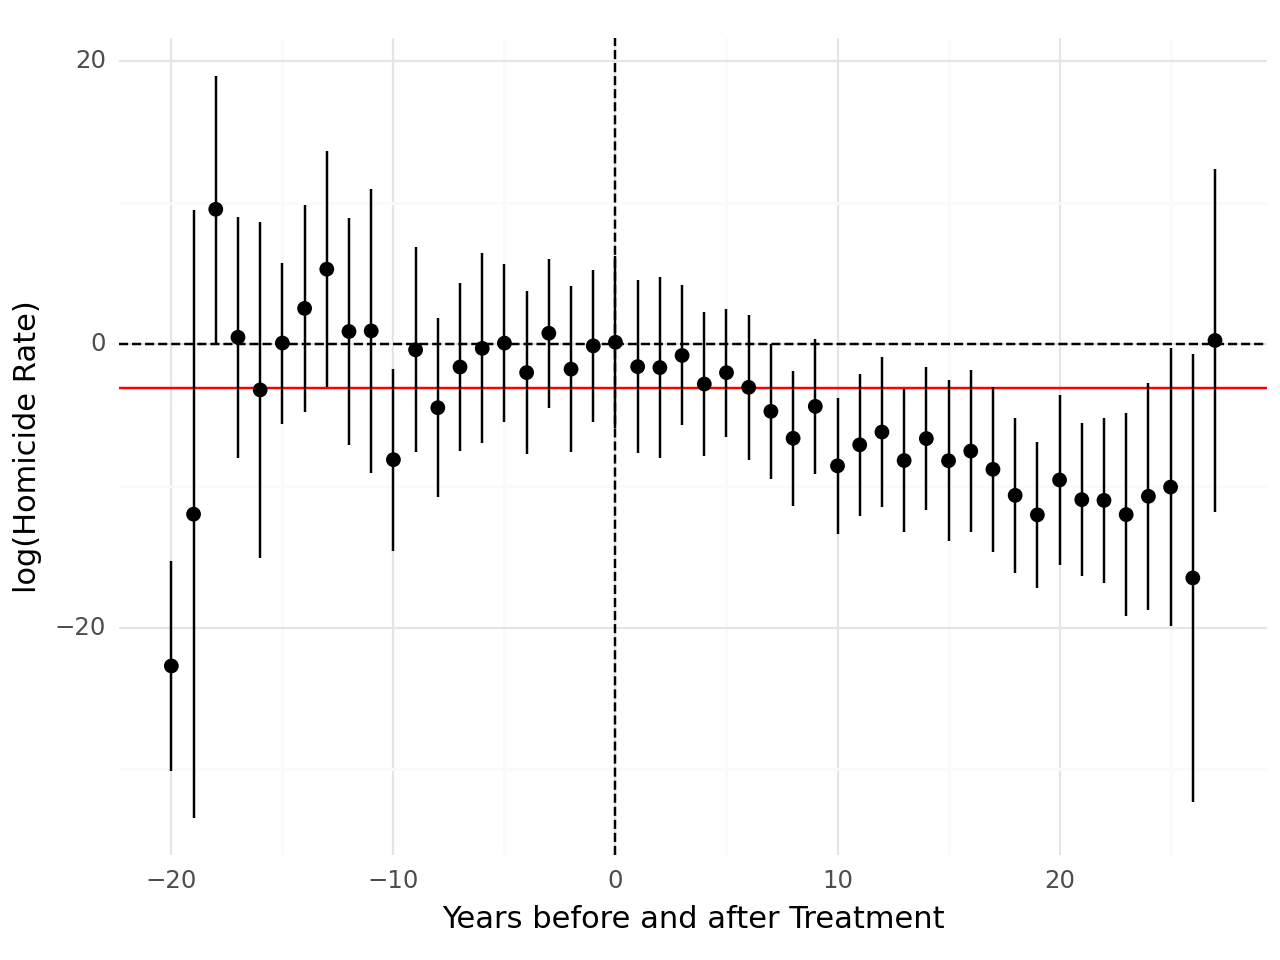

<Figure Size: (640 x 480)>

In [11]:
# Criando as vari√°veis desagregadas do efeito de D manualmente:

data['lead1'] = data['timeToTreat'] == -1
data['lead2'] = data['timeToTreat'] == -2
data['lead3'] = data['timeToTreat'] == -3
data['lead4'] = data['timeToTreat'] == -4
data['lead5'] = data['timeToTreat'] == -5
data['lead6'] = data['timeToTreat'] == -6
data['lead7'] = data['timeToTreat'] == -7
data['lead8'] = data['timeToTreat'] == -8
data['lead9'] = data['timeToTreat'] == -9
data['lead10'] = data['timeToTreat'] == -10
data['lead11'] = data['timeToTreat'] == -11
data['lead12'] = data['timeToTreat'] == -12
data['lead13'] = data['timeToTreat'] == -13
data['lead14'] = data['timeToTreat'] == -14
data['lead15'] = data['timeToTreat'] == -15
data['lead16'] = data['timeToTreat'] == -16
data['lead17'] = data['timeToTreat'] == -17
data['lead18'] = data['timeToTreat'] == -18
data['lead19'] = data['timeToTreat'] == -19
data['lead20'] = data['timeToTreat'] == -20
data['lead21'] = data['timeToTreat'] == -21

data['lag0'] = data['timeToTreat'] == 0 
data['lag1'] = data['timeToTreat'] == 1 
data['lag2'] = data['timeToTreat'] == 2 
data['lag3'] = data['timeToTreat'] == 3 
data['lag4'] = data['timeToTreat'] == 4 
data['lag5'] = data['timeToTreat'] == 5 
data['lag6'] = data['timeToTreat'] == 6 
data['lag7'] = data['timeToTreat'] == 7 
data['lag8'] = data['timeToTreat'] == 8 
data['lag9'] = data['timeToTreat'] == 9 
data['lag10'] = data['timeToTreat'] == 10 
data['lag11'] = data['timeToTreat'] == 11 
data['lag12'] = data['timeToTreat'] == 12 
data['lag13'] = data['timeToTreat'] == 13 
data['lag14'] = data['timeToTreat'] == 14 
data['lag15'] = data['timeToTreat'] == 15 
data['lag16'] = data['timeToTreat'] == 16 
data['lag17'] = data['timeToTreat'] == 17 
data['lag18'] = data['timeToTreat'] == 18 
data['lag19'] = data['timeToTreat'] == 19 
data['lag20'] = data['timeToTreat'] == 20 
data['lag21'] = data['timeToTreat'] == 21 
data['lag22'] = data['timeToTreat'] == 22 
data['lag23'] = data['timeToTreat'] == 23 
data['lag24'] = data['timeToTreat'] == 24 
data['lag25'] = data['timeToTreat'] == 25 
data['lag26'] = data['timeToTreat'] == 26 
data['lag27'] = data['timeToTreat'] == 27 

# Desagregamos o efeito D, e consideramos os efeitos fixos.
formula = "asmrs ~ lead21 + lead20 + lead19 + lead18 + lead17 + lead16 + lead15 + lead14 + lead13 + lead12 + lead11 + lead10 + lead9 + lead8 + lead7 + lead6 + lead5 + lead4 + lead3 + lead2 + lead1 + lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7 + lag8 + lag9 + lag10 + lag11 + lag12 + lag13 + lag14 + lag15 + lag16 + lag17 + lag18 + lag19 + lag20 + lag21 + lag22 + lag23 + lag24 + lag25 + lag26 + lag27 + C(year) + C(stfips)"

# Os coeficientes para o Event Study s√£o estimados:
reg_event_study = smf.wls(formula, data = data).fit(cov_type='HC1')

# Criamos duas listas com os coeficientes estimados
leads = ['lead21[T.True]', 'lead20[T.True]', 'lead19[T.True]', 'lead18[T.True]', 'lead17[T.True]', 'lead16[T.True]', 'lead15[T.True]', 'lead14[T.True]', 'lead13[T.True]', 'lead12[T.True]', 'lead11[T.True]', 'lead10[T.True]', 'lead9[T.True]', 'lead8[T.True]', 'lead7[T.True]', 'lead6[T.True]', 'lead5[T.True]', 'lead4[T.True]', 'lead3[T.True]', 'lead2[T.True]', 'lead1[T.True]']
lags = ['lag1[T.True]', 'lag2[T.True]', 'lag3[T.True]', 'lag4[T.True]', 'lag5[T.True]', 'lag6[T.True]', 'lag7[T.True]', 'lag8[T.True]', 'lag9[T.True]', 'lag10[T.True]', 'lag11[T.True]', 'lag12[T.True]', 'lag13[T.True]', 'lag14[T.True]', 'lag15[T.True]', 'lag16[T.True]', 'lag17[T.True]', 'lag18[T.True]', 'lag19[T.True]', 'lag20[T.True]', 'lag21[T.True]', 'lag22[T.True]', 'lag23[T.True]', 'lag24[T.True]', 'lag25[T.True]', 'lag26[T.True]', 'lag27[T.True]']

# Agora a ideia √© construir um DataFrame com os coeficientes estimados e seus respectivos desvios padr√£o para depois gerar o gr√°fico do Event Study.
# Coeficientes das vari√°veis 'leads' e 'lags'
coef_leads = reg_event_study.params[leads]
coef_lags = reg_event_study.params[lags]

# Desvios padr√£o dos coeficientes 'leads' e 'lags'
std_leads = np.sqrt(np.diag(reg_event_study.cov_params().loc[leads][leads]))
std_lags = np.sqrt(np.diag(reg_event_study.cov_params().loc[lags][lags]))

# Crie um DataFrame para 'leads'
df_leads = pd.DataFrame({
    'mean': coef_leads,
    'sd': std_leads,
    'variable': leads
})

# Crie um DataFrame para 'lags'
df_lags = pd.DataFrame({
    'mean': coef_lags,
    'sd': std_lags,
    'variable': lags
})

# Combine os DataFrames de 'leads' e 'lags'
leadslags_plot = pd.concat([df_leads, df_lags])

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

leadslags_plot['N'] = range(1, len(leadslags_plot) + 1)
leadslags_plot['TimeToTreat'] = leadslags_plot['N'] - 21

# C√≥digo para plotar o Event Study
p.ggplot(leadslags_plot, p.aes(x = 'TimeToTreat', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = -3.0799, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after Treatment") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")

Percebemos no Gr√°fico de Event Study que o efeito do tratamento √© negativo e significativo para os anos posteriores √† interven√ß√£o. Principalmente ap√≥s o s√©timo ano. O efeito m√©dio estimado para o per√≠odo p√≥s-interven√ß√£o √© de -3.0799. Fica evidente que o efeito do tratamento √© gradual.

Esse exemplo anterior foi motivo de muita discuss√£o na literatura. Principalmente na literatura de econometria te√≥rica, porque surge d√∫vidas sobre poss√≠veis vi√©ses do estimador porque eles est√° considerando diversos grupos de tratamento e controles distintos. Por exemplo, existem estados que come√ßam o tratamento em 1971, outros em 1972, outros em 1973, e assim por diante. 

In [1]:
# Load packages
import pandas as pd
import numpy as np
from datetime import date
from tqdm import tqdm
import plotly.graph_objects as go
import telegram_send
import paneleventstudy as es
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")


In [2]:
# Outcome (Suicide Mortality)
df['Y'] = df['asmrs']
# Treatment D (Staggered treatment adoption)
df['D'] = df['post']
# Covari√°veis - pcinc asmrh cases
df['X1'] = df['pcinc']
df['X2'] = df['asmrh']
df['X3'] = df['cases']

# Identifica√ß√£o do painel
df['year'] = df['year'].astype(int)
df['id'] = df['stfips'].astype('category').cat.codes + 1


# Relative time (Tempo relativo at√© o tratamento - ocorre somente para os tratados)
df['reltime'] = df['year'] - df['_nfd']
# colocar valor zero caso tenha dados faltantes
df['reltime'] = df['reltime'].fillna(0)
# garantir que 'reltime' seja um inteiro
df['reltime'] = df['reltime'].astype(int)

# Generates a new column called 'ct' containing the numerics version of calendar time 'year'
df['ct'] = df['year'] - 1964

# Vamos criar a vari√°vel de grupo (cohoort) e G (Callaway-SantAnna)
df['cohort'] = df['_nfd'] - 1965
df['G']=df['_nfd']

# control group
df['treated'] = 0
df.loc[df['_nfd'] > 0, 'treated'] = 1
df['control_group'] = 1
df.loc[df['treated'] == 1, 'control_group'] = 0

# Criar uma coluna que identifica os indiv√≠duos que nunca foram tratados (nevertreated)
df['nevertreated'] = 0
df.loc[df['treated'] == 0, 'nevertreated'] = 1

# Criar uma coluna que identifica os indiv√≠duos que sempre foram tratados (alwaystreated) Deve ser 1 para todos os anos ap√≥s o tratamento D
df['mean_treat'] = df.groupby('id')['D'].transform('mean')
# Criar os sempre tratados
df['alwaystreated'] = 0
df.loc[(df['mean_treat'] == 1), 'alwaystreated'] = 1

In [3]:
# TWFE naive - Dynamic Difference-in-Differences

# Especificar a f√≥rmula com a categoria 0 de reltime como refer√™ncia diretamente
formula = 'Y ~ C(reltime, Treatment(reference=0)) + C(id) + C(year)'

# Ajustar o modelo
twfe = smf.ols(formula, data=df).fit(cov_type='HC1')

# Extraindo os resultados
beta = pd.DataFrame(twfe.params, columns=['coef'])  # Coeficientes estimados
ci = twfe.conf_int()  # Intervalos de confian√ßa

# Renomear as colunas do intervalo de confian√ßa para consist√™ncia
ci.columns = ['lower', 'upper']

# Combinar os resultados em um √∫nico DataFrame
est = beta.join(ci)

# Manter apenas os coeficientes relativos ao efeito de reltime
est = est.reset_index(drop=False)
est = est[est['index'].str.contains('C(reltime, Treatment(reference=0))[T.', regex=False)]  

# Clean the coefficient names for readability
est['index'] = est['index'].str.replace('C(reltime, Treatment(reference=0))[T.', '', regex=False)  # Remove the prefix
est['index'] = est['index'].str.replace(']', '', regex=False)         # Remove closing brackets

# Set the index to the cleaned relative time
est = est.set_index('index')

est = est.reset_index()  # Transforma o √≠ndice em uma coluna
est['index'] = pd.to_numeric(est['index'])  # Converte para num√©rico

est = est.sort_values('index')  # Agora ordenar√° corretamente
# Certifique-se de que o √≠ndice √© num√©rico para ordena√ß√£o
est.index = pd.to_numeric(est.index)

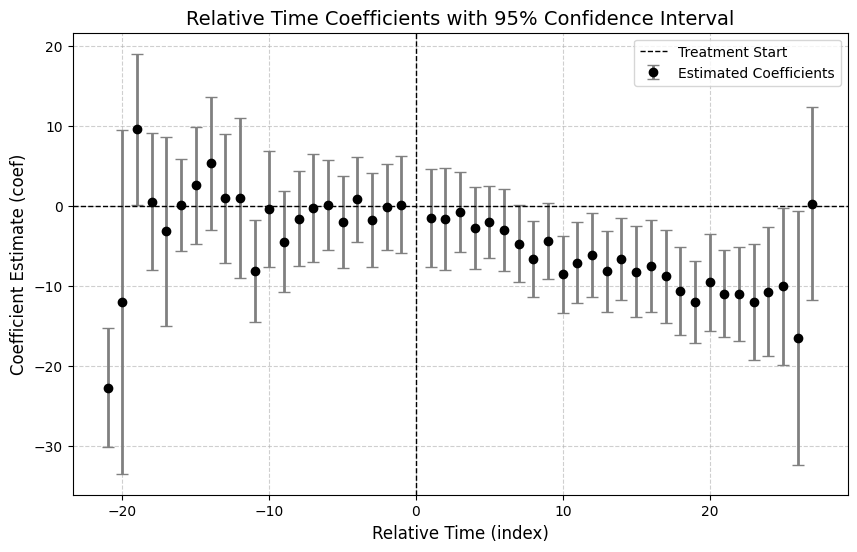

In [10]:
import matplotlib.pyplot as plt

# Configurar o gr√°fico
plt.figure(figsize=(10, 6))

# Plotar os coeficientes com barras de erro
plt.errorbar(
    est['index'],  # Valores do eixo x
    est['coef'],   # Valores do eixo y (coeficientes)
    yerr=[est['coef'] - est['lower'], est['upper'] - est['coef']],  # Barras de erro
    fmt='o', color='black', ecolor='gray', elinewidth=2, capsize=4, label='Estimated Coefficients'
)

# Adicionar uma linha horizontal no valor 0 para refer√™ncia
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Adicionar linha vertical para o in√≠cio do tratamento em zero
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Treatment Start')

# Adicionar t√≠tulo e r√≥tulos
plt.title('Relative Time Coefficients with 95% Confidence Interval', fontsize=14)
plt.xlabel('Relative Time (index)', fontsize=12)
plt.ylabel('Coefficient Estimate (coef)', fontsize=12)

# Adicionar grade e legenda
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Exibir o gr√°fico
plt.show()


#### Considera√ß√µes sobre o DD

Para que o DD identifique o efeito causal, √© importante que tanto indiv√≠duos tratados quanto os de controle permane√ßam similares nas suas **caracter√≠sticas n√£o observ√°veis** ao longo do tempo, especialmente ap√≥s a interven√ß√£o.

Caso ocorram mudan√ßas expressivas que afetem a composi√ß√£o dos indiv√≠duos que formam os grupos, haver√° complica√ß√£o na comparabilidade temporal. (P. ex., migra√ß√£o entre munic√≠pios, habilidades valorizadas em determinados mercados de trabalho, etc).

A perda de comparabilidade dos grupos ao longo do tempo compromete o DD.

De forma geral, o estimador DD **n√£o identificar√° o efeito causal de interesse** quando houver algum tipo de **caracter√≠stica n√£o observ√°vel que varie no tempo** e **afete** simultaneamente a **vari√°vel de resultado e a escolha pelo tratamento**. (p.ex. vari√°vel de confus√£o n√£o observ√°vel n√£o constante).

#### Boas Pr√°ticas para o DD

* Verificar se as caracter√≠sticas observ√°veis dos tratados e controles permanecem relativamente est√°veis no tempo. 
* √â importante tentar verificar se as tend√™ncias temporais da vari√°vel de resultado entre os grupos s√£o semelhantes antes da interven√ß√£o (Event Study).